# LOGISTIC REGRESSION

AIM: 
To predict the risk of heart stroke using logistic regression model with the help of various factors that leads to heart diseases.

DATASET DESCRIPTION:the dataset is obtained from kaggle titled 'framingham' 

link to the dataset: https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression

the feature in dataset:
* Gender
* Age
* education: postgraduate, primaryschool, uneducated, graduate
* Current Smoker: whether the patient is a current smoker or not
* Cigs Per Day
* BP Meds: whether the patient was on blood pressure medication or not
* Prevalent Stroke: whether the patient had previously had a stroke or not
* Prevalent Hyp: whether the patient was hypertensive or not 
* Diabetes: whether or not the patient had diabetes
* Tot Chol
* Sys BP
* Dia BP
* BMI
* Heart Rate
* Glucose

the final attribute 'heart_ stroke' is in binary form (yes and no) which is the target variable to be predicted using logistic regression

In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm 
from sklearn.metrics import confusion_matrix, classification_report, r2_score

In [2]:
#loading the dataset
data=pd.read_csv('C:/Users/carol/Desktop/heart_disease_new.csv')

In [3]:
data.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No


In [4]:
data.tail()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
4233,Male,50,uneducated,1,1.0,0.0,no,1,0,313.0,179.0,92.0,25.97,66.0,86.0,yes
4234,Male,51,graduate,1,43.0,0.0,no,0,0,207.0,126.5,80.0,19.71,65.0,68.0,No
4235,Female,48,primaryschool,1,20.0,NaN,no,0,0,248.0,131.0,72.0,22.00,84.0,86.0,No
4236,Female,44,uneducated,1,15.0,0.0,no,0,0,210.0,126.5,87.0,19.16,86.0,NaN,No
4237,Female,52,primaryschool,0,0.0,0.0,no,0,0,269.0,133.5,83.0,21.47,80.0,107.0,No


In [5]:
#to understand the datatype of the variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  Heart_ stroke    4238 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 529.9+ KB


from the above info(), we see that there are 4 categorical attributes and rest 12 being numerical (4 int and 8 float)

In [6]:
data.shape

(4238, 16)

there are 4238 records with 16 attributes

In [7]:
#to get a statistical inference from the data
data.describe()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4238.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000
mean,49.584946,0.494101,9.003089,0.029630,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753
std,8.572160,0.500024,11.920094,0.169584,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000
75%,56.000000,1.000000,20.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000
max,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000


we obtain a statistical inference from the above 

we see that the mean and median of age, heart rate, BMI, diaBP, totchol is same implying normal distribution with values 75, 25, 82 respectively.

mean of glucose and sysBP is found to be higher than its median implying that it is right skewed.

# Data pre-processing

In [8]:
#splitting the dataset into categorical and numerical 
cat= data[['Gender','education','currentSmoker','prevalentStroke','prevalentHyp','diabetes','Heart_ stroke']]
num= data[['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']]

In [9]:
#checking for duplicate records
data.duplicated().sum()

0

In [10]:
#checking for null values
data.isnull().sum()

Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
Heart_ stroke        0
dtype: int64

the attributes like education, cigsperday, BPMeds, totchol, BMI, heartrate, glucose have null values and it should be either dropped or imputed

In [11]:
data['Heart_ stroke'].unique()

array(['No', 'yes'], dtype=object)

In [12]:
# removing or imputing null values
na = ['BPMeds','totChol','BMI','heartRate','glucose','cigsPerDay']
for i in na: 
    data[i].fillna(data[i].mean(),inplace=True)
    

In [13]:
data['education']=data['education'].fillna('unknown')

In [14]:
data.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
Heart_ stroke      0
dtype: int64

Null values are removed

# Exploratory data analysis

UNIVARIATE ANALYSIS

In [15]:
data['Heart_ stroke'].value_counts()

No     3594
yes     644
Name: Heart_ stroke, dtype: int64

<AxesSubplot:xlabel='Heart_ stroke', ylabel='count'>

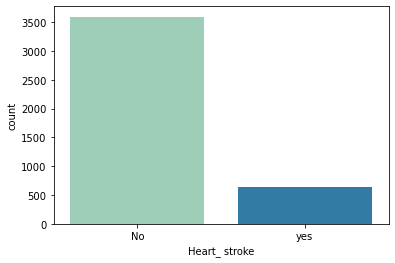

In [16]:
sns.countplot(data['Heart_ stroke'],palette='YlGnBu')

From the entire dataset, there are around 600 heart stroke patient and those who are not affected are around 3500

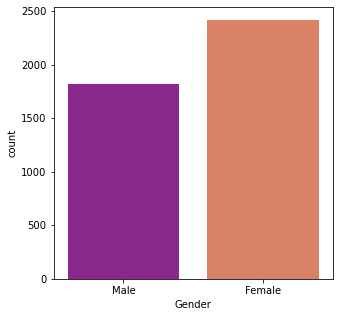

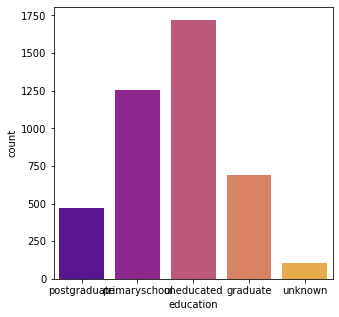

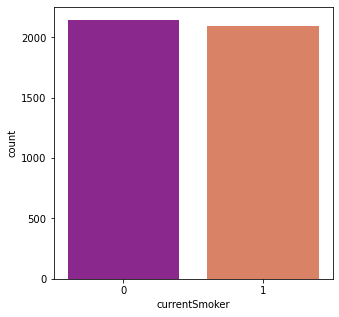

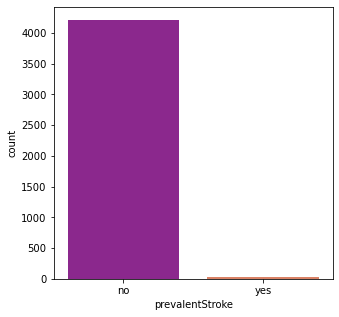

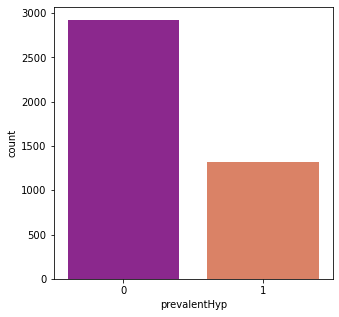

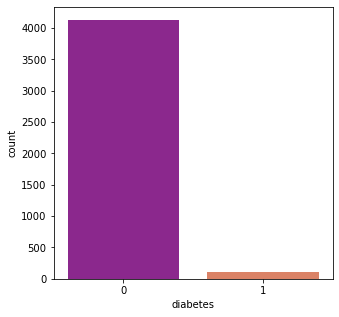

In [17]:
for i in cat.drop(columns='Heart_ stroke'):
    plt.figure(figsize=(5,5))
    sns.countplot(data[i],palette='plasma')

Insights from the above countplots for the categorical attributes, from the entire set:
* there are around 2450 female and around 1750 males
* the number of uneducated people are maximum, followed by primary school
* number of current smokers and the ones who are not are same
* people who do not have history of stroke are very high
* people those who are hypertensive are around 1200, half the number of people who are not
* the number of patients having diabetes is very less

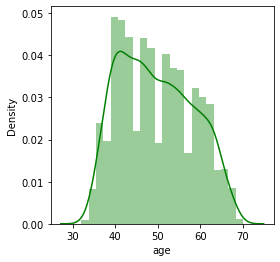

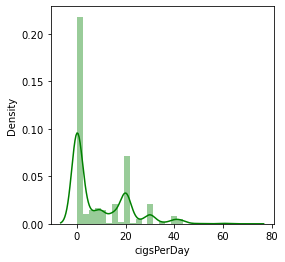

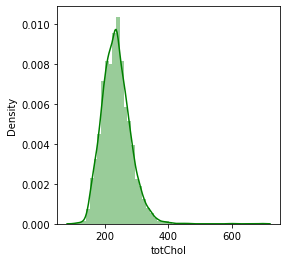

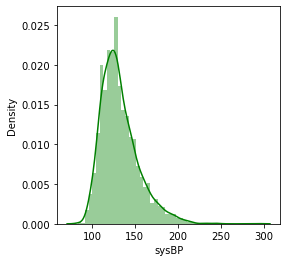

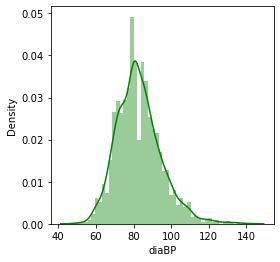

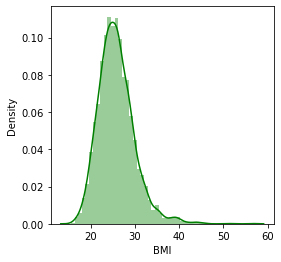

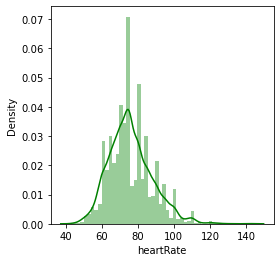

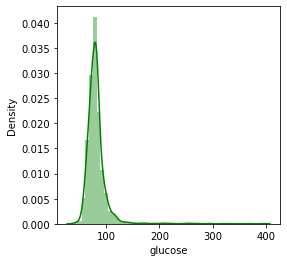

In [18]:
for i in num.columns:
    plt.figure(figsize=(4,4))
    sns.distplot(data[i],color='green')

Inferernce from the density plot:

* age, diaBP, heartrate and BMI has uniform distribution
* cigsPerDay has a highly uneven distribution most of the patients do not smoke
* sysBP, glucose, totChol shows right skewness


<AxesSubplot:>

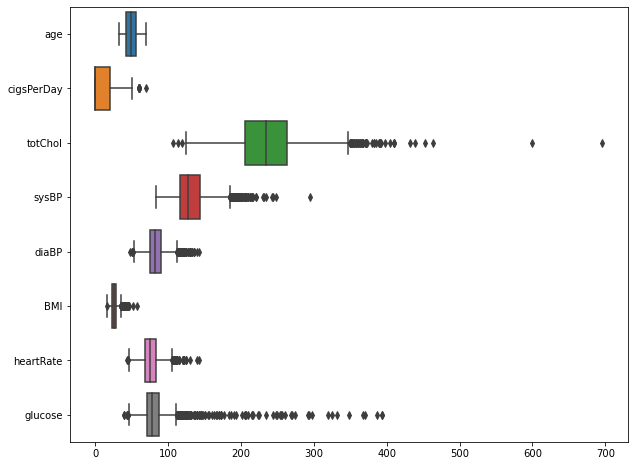

In [19]:
plt.figure(figsize=(10,8))
sns.boxplot(data=num,orient="h")

The domain we are dealing with is healthcare, which is why it is importance to ensure that the outliers we remove are not detrimental to the model

Here we see that there are outliers present in all attributes except age. 

Since extreme outliers are present in total cholestrol and systolic BP, we will remove that.

In [20]:
#treating extreme outliers
print(data['totChol'].max())
print(data['sysBP'].max())

696.0
295.0


In [21]:
data = data[data['totChol']<696.0]
data = data[data['sysBP']<295.0]

In [22]:
data.shape

(4236, 16)

BIVARIATE ANALYSIS

In [23]:
# changing the categorical into numerical
target=[]
for i in data['Heart_ stroke']:
 if (i=='yes'):
   target.append(1)
 else:
   target.append(0)

data['Heart_ stroke']=target

In [24]:
target2=[]
for i in data['Gender']:
 if (i=='Male'):
   target2.append(1)
 else:
   target2.append(0)

data['Gender']=target2

In [25]:
target3=[]
for i in data['prevalentStroke']:
 if (i=='yes'):
   target3.append(1)
 else:
   target3.append(0)

data['prevalentStroke']=target3

In [26]:
label_encoder =LabelEncoder()
data['education'] = label_encoder.fit_transform(data['education'])

In [27]:
data.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,1,39,1,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,3,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

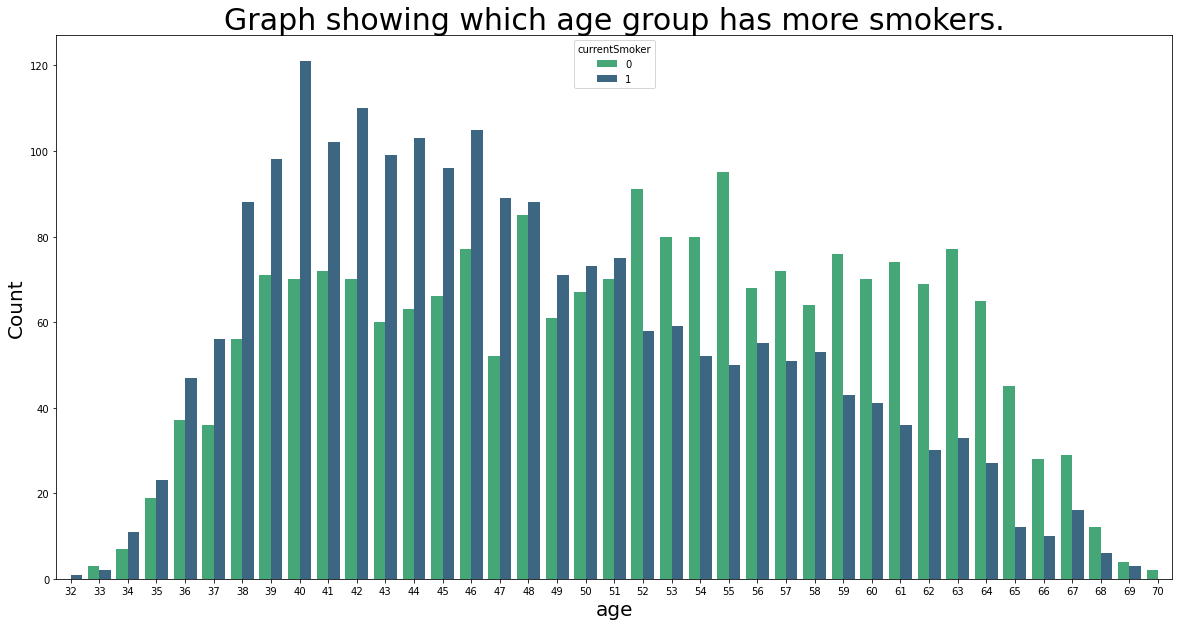

In [28]:
plt.figure(figsize=(20,10), facecolor='w')
sns.countplot(x="age",data=data,hue="currentSmoker", palette='viridis_r')
plt.title("Graph showing which age group has more smokers.", size=30)
plt.xlabel("age", size=20)
plt.ylabel("Count", size=20)
plt.xticks(size=10)
plt.yticks(size=10)

The graph above shows that maximum number of people currently smoking are in the age group of 38 to 48.

Maximum number of people not smoking belong to the age group of 52 to 63.

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

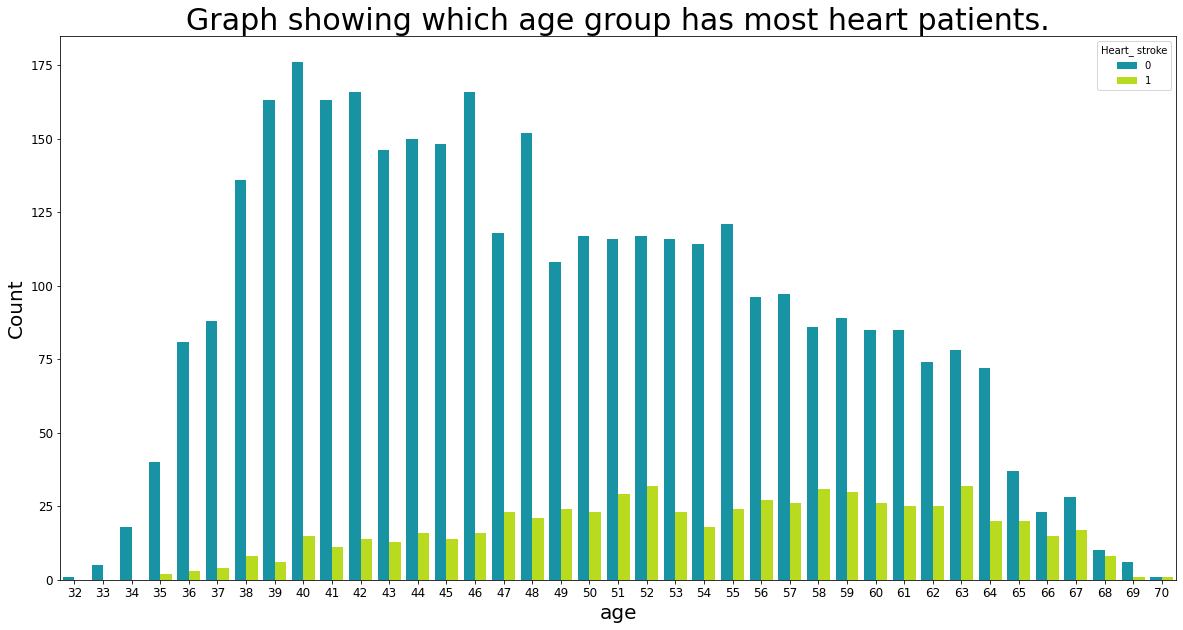

In [29]:
plt.figure(figsize=(20,10), facecolor='w')
sns.countplot(x="age",data=data,hue="Heart_ stroke", palette='nipy_spectral')
plt.title("Graph showing which age group has most heart patients.", size=30)
plt.xlabel("age", size=20)
plt.ylabel("Count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

Heart stroke is seen in aged people especially in the age group of 52 to 63. 

<AxesSubplot:title={'center':'relationship between education and heart stroke'}, xlabel='education', ylabel='Heart_ stroke'>

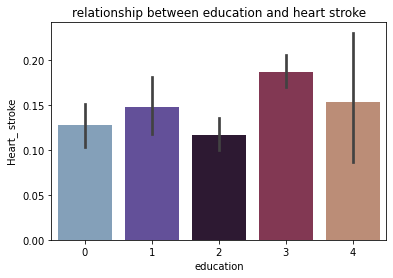

In [30]:
plt.title('relationship between education and heart stroke')
sns.barplot(data=data, x='education', y='Heart_ stroke',palette='twilight')

Education is not seen to affect heart stroke

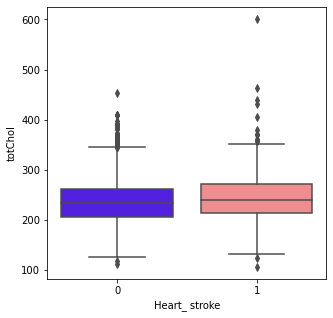

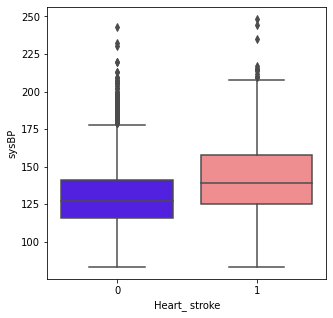

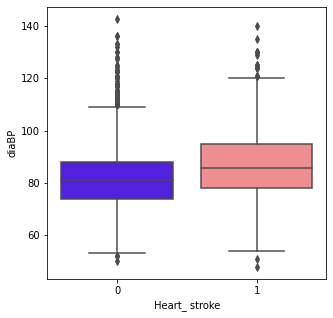

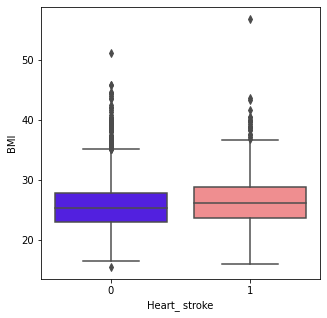

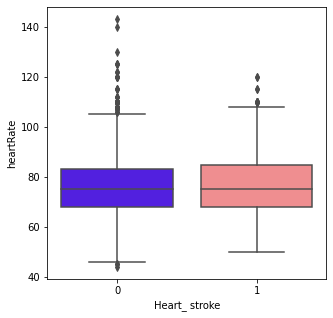

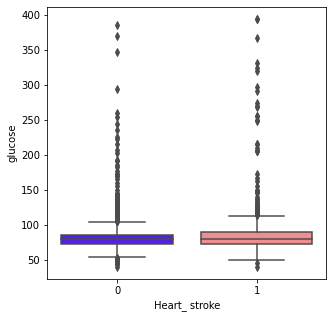

In [31]:

cols=['totChol','sysBP','diaBP','BMI','heartRate','glucose']
for i in cols:
    plt.figure(figsize=(5,5))
    sns.boxplot(data=data, x='Heart_ stroke', y=i,palette='gnuplot2')

Inference from the above graphs:

* most of the records of patients having stroke is seen to have slightly higher cholestrol level.
* systolic BP in case of people prone to heart stroke is higher than the others with 50% of the data lying in the range 125 to 150 and median 140, whereas the normal systolic BP value 120. 
* Similarly, diastolic BP in case of people prone to heart stroke is also higher than the others with 50% of the data lying in the range 79 to 95 and median around 85, whereas the normal systolic BP value 80.
* BMI, heartrate, glucose of people having heart stroke and those who do not are similar.



<AxesSubplot:xlabel='sysBP', ylabel='totChol'>

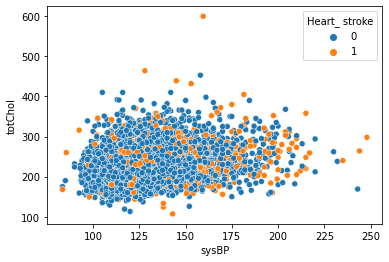

In [32]:
sns.scatterplot(data=data, y='totChol', x='sysBP', hue= 'Heart_ stroke')

<AxesSubplot:xlabel='age', ylabel='cigsPerDay'>

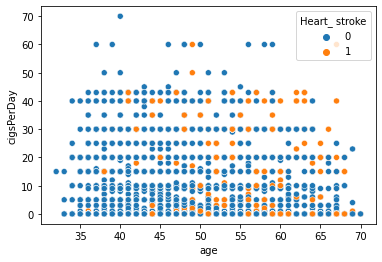

In [33]:
sns.scatterplot(data=data, y='cigsPerDay', x='age', hue= 'Heart_ stroke')

With increase in cholestrol and systolic BP, we see more number of heart stroke patient

With in age, we see more number of heart stroke patients

<AxesSubplot:title={'center':'Correlation between variables'}>

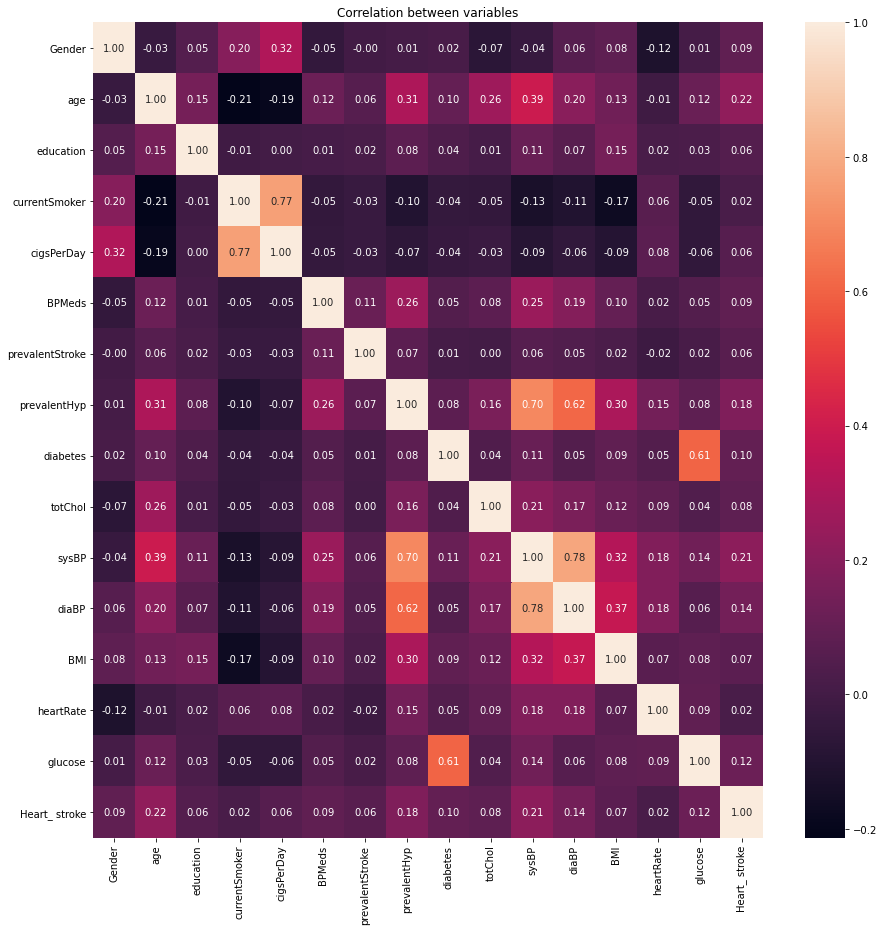

In [34]:
plt.figure(figsize = (15,15))
plt.title('Correlation between variables')
corr = data.corr()
sns.heatmap(corr, annot = True, fmt = ".2f")

From the above correlation heatmap, we see that:
 
* systolic BP and diastolic BP has a correlation of 0.78 
* cigsperday and currentsmoker has a correlation of 0.77
* there is no high correlation between the other attributes 

# Model building


MODEL 1

In [83]:
#data is split in the ratio 70:30
x = data.drop(columns=['Heart_ stroke'], axis=1)
y = data['Heart_ stroke']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)


In [84]:
#scaling the data
scaler = MinMaxScaler()
data2= scaler.fit_transform(data)
data2 = pd.DataFrame(data2,columns=data.columns)

In [85]:
data2.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,1.0,0.184211,0.25,0.0,0.000000,0.0,0.0,0.0,0.0,0.178499,0.136778,0.232804,0.277024,0.363636,0.104520,0.0
1,0.0,0.368421,0.50,0.0,0.000000,0.0,0.0,0.0,0.0,0.290061,0.227964,0.349206,0.319680,0.515152,0.101695,0.0
2,1.0,0.421053,0.75,1.0,0.285714,0.0,0.0,0.0,0.0,0.279919,0.267477,0.338624,0.237518,0.313131,0.084746,0.0
3,0.0,0.763158,0.00,1.0,0.428571,0.0,0.0,1.0,0.0,0.239351,0.404255,0.497354,0.316045,0.212121,0.177966,1.0
4,0.0,0.368421,0.00,1.0,0.328571,0.0,0.0,0.0,0.0,0.361055,0.282675,0.380952,0.183228,0.414141,0.127119,0.0


In [86]:
#building model and predicting the the testing data
lr= LogisticRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [87]:
print('Model accuracy score:')
accuracy_score(y_test, y_pred)


Model accuracy score:


0.8520849724626278

In [88]:
y_pred2 = lr.predict(x_train)
print('Training set accuracy score:')
accuracy_score(y_train, y_pred2)


Training set accuracy score:


0.8495784148397977

<AxesSubplot:>

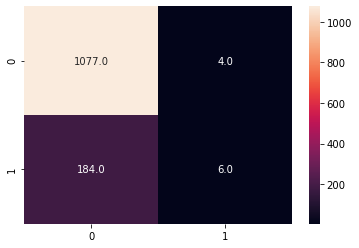

In [89]:
# Print confusion matrix
cm_test = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_test, annot=True, fmt=".1f")

In [90]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.854084,0.600000,0.852085,0.727042,0.816101
recall,0.996300,0.031579,0.852085,0.513939,0.852085
f1-score,0.919727,0.060000,0.852085,0.489863,0.791207
support,1081.000000,190.000000,0.852085,1271.000000,1271.000000


MODEL 2 

we eliminate 3 attributes as the do not affect the heart stroke, 'diaBP','education','currentSmoker',

In [91]:
y2=data['Heart_ stroke']
x2= data.drop(columns=['Heart_ stroke','diaBP','education','currentSmoker'])
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.3, random_state = 0)


In [92]:
lr= LogisticRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [93]:
print('Model accuracy score:')
accuracy_score(y_test, y_pred)

Model accuracy score:


0.8505114083398898

In [94]:
y_pred2 = lr.predict(x_train)
y_pred2
print('Training set accuracy  score:')
accuracy_score(y_train, y_pred2)

Training set accuracy  score:


0.8478920741989882

<AxesSubplot:>

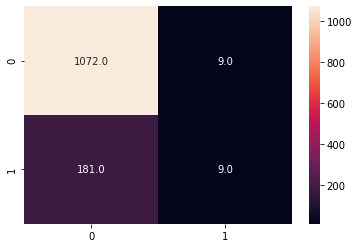

In [95]:
# Print confusion matrix
cm_test = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_test, annot=True, fmt=".1f")

In [96]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.855547,0.500000,0.850511,0.677773,0.802397
recall,0.991674,0.047368,0.850511,0.519521,0.850511
f1-score,0.918595,0.086538,0.850511,0.502567,0.794212
support,1081.000000,190.000000,0.850511,1271.000000,1271.000000


 MODEL 3
 
Back elimination is done by removing the independent attributes which does not affect the price of the car.

P-values are a measure of how important a feature is. A p-value is a threshold value. A feature with value above this will be removed. here we have set the p value threshold as 0.05.  

The OLS() function to perform Ordinary Least Square regression and summary() gives an overview of the regression results

In [97]:
lm = sm.OLS(y2,x2).fit() 
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:          Heart_ stroke   R-squared (uncentered):                   0.219
Model:                            OLS   Adj. R-squared (uncentered):              0.217
Method:                 Least Squares   F-statistic:                              98.94
Date:                Thu, 30 Mar 2023   Prob (F-statistic):                   1.16e-216
Time:                        16:11:07   Log-Likelihood:                         -1493.1
No. Observations:                4236   AIC:                                      3010.
Df Residuals:                    4224   BIC:                                      3086.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

Both totchol and glucose has a p value higher than 0.05. but cholestrol is an important factor in heart problem and glucose is not. so we eliminate glucose from this.

In [98]:
x3 = data.drop(columns=['Heart_ stroke','diaBP','education','currentSmoker','glucose'], axis=1)
y3 = data['Heart_ stroke']

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x3, y3, test_size = 0.3, random_state = 0)

In [100]:
lr= LogisticRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [101]:
print('Model accuracy score:')
accuracy_score(y_test, y_pred)


Model accuracy score:


0.8457907159716759

In [102]:
y_pred2 = lr.predict(x_train)
y_pred2
print('Model accuracy score:')
accuracy_score(y_train, y_pred2)


Model accuracy score:


0.8468802698145025

<AxesSubplot:>

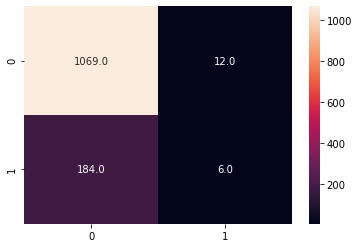

In [103]:
# Print confusion matrix
cm_test = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_test, annot=True, fmt=".1f")

In [104]:
# Print train metric report
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.853152,0.333333,0.845791,0.593243,0.775445
recall,0.988899,0.031579,0.845791,0.510239,0.845791
f1-score,0.916024,0.057692,0.845791,0.486858,0.787713
support,1081.000000,190.000000,0.845791,1271.000000,1271.000000


# Conclusion

1. The model was built to prdict the chance of a person having heart stroke with respect to the given health factors. 


2. First step: the required libraries were imported and dataset was loaded. 


3. Data preprocessing was done to make the data clean before building the model.


4. Exploratory data analysis is done in order to get insights regarding the data, to understand the features and its relationship with one another. 


5. Visualisation are made to get the inferences easily.


6. Features that contribute to the heart stroke are selected and the least important features were eliminated. 


7. With the important features, logistic regression model was built.


8. The final model that can be used is model 2. Removing the attribute glucose can reduce the accuracy. 
* the accuracy is 85%
* the records that are correctly classified as 0 is 1072, and correctly classified as 1 is 9 which is high compared to the other models.
* f1 score of 0 is 0.91 which is very good but that of 1 is 0.08 which is less
* precision score of both 0 and 1 are good with score of 0.85 and 0.50 respectively.